# Parte 1 - Resolvendo um  Problema Linearmente Separável

> Autor: Jonatas Travessa Souza de Barros - 1935310001

> Autor: Franscisco Arcos Filho - 1215080042

## Importação das bibliotecas

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import os

## Leitura do arquivo dataAll.txt com numpy

In [2]:
dataAll = np.fromfile('../dados/dataAll.txt')
print(dataAll)

[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]


### Vendo o formato inicial do array

In [3]:
dataAll.shape

(3000,)

#### Sendo 3000 valores, significa que há 1000 exemplos, visto que cada exemplo é representado por (x1, x2, yd). Logo, vamos transformar o array para representar os exemplos.

In [4]:
dataAll = dataAll.reshape(1000, 3)
print(dataAll)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


## Algoritmo de treinamento do Perceptron

#### A implementação do algoritmo de treinamento do Perceptron usado para resolver a parte 1 está na pasta src cujo aqruivo python foi chamado de Peceptron_general.py.

In [5]:
import sys
sys.path.append('../')
from src.Perceptron_general import Perceptron_general

#### Assim como na especificação da atividade será utilizada uma função degrau com valor de theta igual a 0 e uma taxa de aprendizado = 0,1 e também um viés.

In [6]:
theta = 0.0
n = 0.1
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve ser impresso no início da execução do algoritmo. Além disso, será considerado precisão de 4 casas decimais.

In [7]:
weights = perceptron.inittial_weights(-0.5, 0.5)
weights

array([-0.4045,  0.0815,  0.4693])

#### processo de aprendizado.

In [8]:
perceptron.fitParte1(dataAll)


Vetor de pesos ajustado, novo vetor de pesos
[ -0.3045  36.4603 -23.9449]

Vetor de pesos ajustado, novo vetor de pesos
[  -0.2045  -17.1988 -100.4406]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.3045  55.5972 -64.611 ]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.4045 138.1959  15.2448]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.3045 144.0417 -63.0498]

Vetor de pesos ajustado, novo vetor de pesos
[  -0.2045  104.0328 -140.9425]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.1045 157.7026 -91.8502]

Vetor de pesos ajustado, novo vetor de pesos
[  -0.2045  104.7425 -148.7197]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.1045 164.302  -98.5974]

Vetor de pesos ajustado, novo vetor de pesos
[  -0.2045  118.7774 -164.2333]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.1045 209.4933 -89.52  ]

Vetor de pesos ajustado, novo vetor de pesos
[  -0.2045  151.7123 -149.8282]

Vetor de pesos ajustado, novo vetor de pesos
[  -0.3045  103.4457 -198.2979]

Vetor d

## Resultados

#### O número total de ajustes do vetor de pesos foi de 55.
#### O número de épocas até a convergência foi de 4.

#### O seguinte vetor de pesos é capaz de prover a saída correta para todos os exemplos presentes em dataAll.txt.

In [9]:
weights = perceptron.getWeights()
weights

array([  -0.9045,  323.4906, -323.0413])

### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [10]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1000.0)

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-1000.0)

### Gráfico do conjunto de dados e a reta que separa as classes

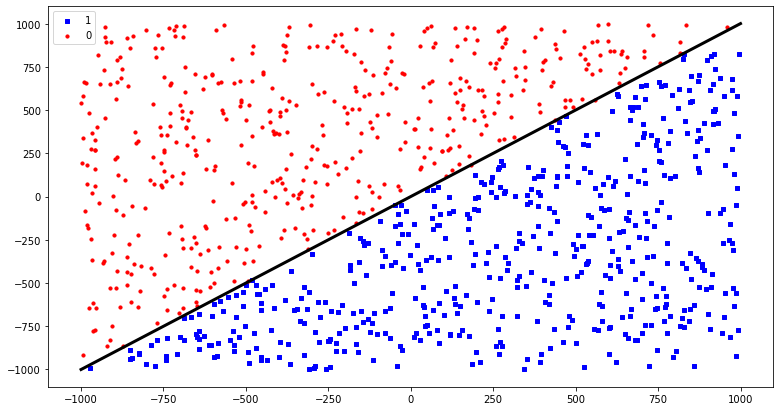

In [11]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in dataAll:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1000, -1000],[x2_1, x2_2], color='black', linewidth=3)
plt.show()
